In [2]:
import pandas as pd
import copy, math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [4]:
# load the dataset
housing = fetch_california_housing()
# converting it to a dataframe to see it clearly
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['MedHouseval'] = housing.target
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseval  
0      

In [6]:
# Convert the features to a Numpy array (X)
X_train = df.drop("MedHouseval", axis = 1).values
y_train = df["MedHouseval"].values
print(f"The feature array =\n {X_train}")
print(f"The output array =\n {y_train}")
print(f"The shape of the feature array: {X_train.shape}")
print(f"The shape of the output array: {y_train.shape}")

The feature array =
 [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
The output array =
 [4.526 3.585 3.521 ... 0.923 0.847 0.894]
The shape of the feature array: (20640, 8)
The shape of the output array: (20640,)


In [7]:
# define the cost function 
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features, here it is (20640, 8)
      y (ndarray (m,)) : target values, here it is (20640)
      w (ndarray (n,)) : model parameters, here it is (8,)  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2*m)
    return cost

In [8]:
# define the gradient function
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err

    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_db, dj_dw

In [9]:
# define the gradient descend
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    # An array to store cost J and w's at each iteration primarily for plotiing them later
    J_history = []
    w = copy.deepcopy(w_in) # to avoid the modification of global w within function
    b = b_in

    for i in range(num_iters):
        # calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w, b)

        #update the parameters using w, b, alpha and gradients
        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        # Save the cost(J) at each iteration
        if i<100000:        #keeping this limit as my system has no GPU and CPU is very low
            J_history.append(cost_function(X, y, w, b))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for plotting           


In [14]:
# Z-Score Normalization
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train_scaled = (X_train - X_train_mean) / X_train_std

# initialize the parameters (Added .shape)
initial_w = np.zeros(X_train_scaled.shape[1])
initial_b = 0.

# assigning gradient descent settings
iterations = 1000
alpha = 0.01

# run the gradient descent
w_final, b_final, J_hist = gradient_descent(X_train_scaled, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

# check for first 5 
for i in range(5):
    print(f"prediction: {np.dot(X_train_scaled[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost     2.76   
Iteration  100: Cost     0.64   
Iteration  200: Cost     0.36   
Iteration  300: Cost     0.31   
Iteration  400: Cost     0.30   
Iteration  500: Cost     0.29   
Iteration  600: Cost     0.29   
Iteration  700: Cost     0.28   
Iteration  800: Cost     0.28   
Iteration  900: Cost     0.28   
b,w found by gradient descent: 2.07,[ 0.81659877  0.17689017 -0.12729893  0.14127008  0.0166395  -0.04392099
 -0.48604502 -0.44967077] 
prediction: 4.13, target value: 4.526
prediction: 3.89, target value: 3.585
prediction: 3.78, target value: 3.521
prediction: 3.22, target value: 3.413
prediction: 2.43, target value: 3.422


Plot saved successfully as 'cost_vs_iteration.png'


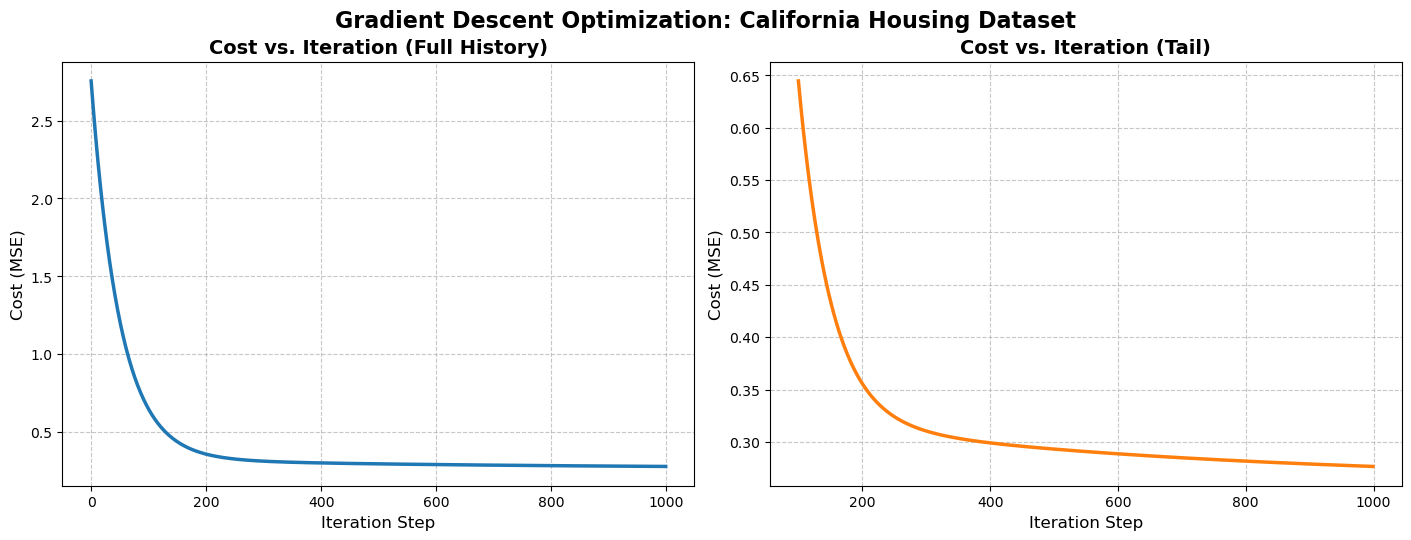

In [16]:
# Plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(14, 5))

# Plot 1: Full History (Using a professional blue)
ax1.plot(J_hist, color='#1f77b4', linewidth=2.5)
ax1.set_title("Cost vs. Iteration (Full History)", fontsize=14, fontweight='bold')
ax1.set_ylabel('Cost (MSE)', fontsize=12)
ax1.set_xlabel('Iteration Step', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7) # Adds a subtle grid

# Plot 2: Tail History (Using a contrasting orange)
tail_start = 100
ax2.plot(tail_start + np.arange(len(J_hist[tail_start:])), J_hist[tail_start:], color='#ff7f0e', linewidth=2.5)
ax2.set_title("Cost vs. Iteration (Tail)", fontsize=14, fontweight='bold')
ax2.set_ylabel('Cost (MSE)', fontsize=12)
ax2.set_xlabel('Iteration Step', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

# Add a prominent main title for the whole figure
fig.suptitle("Gradient Descent Optimization: California Housing Dataset", fontsize=16, fontweight='bold', y=1.05)

# Save the plot for GitHub and LinkedIn BEFORE plt.show()
plt.savefig('cost_vs_iteration.png', dpi=300, bbox_inches='tight')
print("Plot saved successfully as 'cost_vs_iteration.png'")

plt.show()